In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [100]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

db_url = f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}'

engine = create_engine(db_url)

dsbc_df = pd.read_sql_query('SELECT * FROM useducation;', con=engine)

# close the db connetion
engine.dispose()

In [101]:
dsbc_df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [110]:
print(dsbc_df.info())
print(dsbc_df.isnull().sum()*100/dsbc_df.isnull().count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?


<AxesSubplot:>

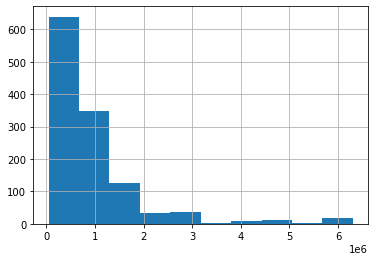

In [112]:
df_copy = dsbc_df.copy()
df_copy.ENROLL.hist()

In [113]:
# based on the distribution fill null in ENROLL with median value
df_copy.ENROLL.fillna(df_copy.ENROLL.median(), inplace=True)
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

<AxesSubplot:>

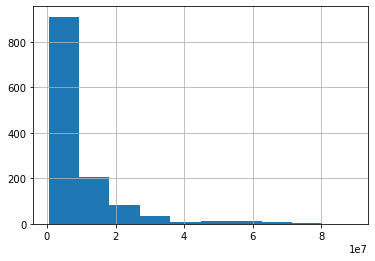

In [114]:
df_copy.TOTAL_REVENUE.hist()

In [115]:
# based on the distribution fill null in TOTAL_REVENUE with median value
df_copy.TOTAL_REVENUE.fillna(df_copy.TOTAL_REVENUE.median(), inplace=True)
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

<AxesSubplot:>

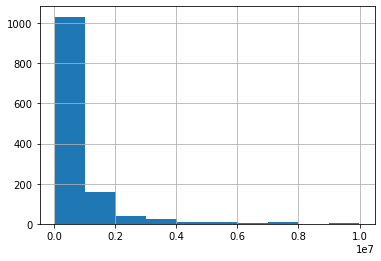

In [116]:
df_copy.FEDERAL_REVENUE.hist()

In [117]:
# based on the distribution fill null in FEDERAL_REVENUE with median value
df_copy.FEDERAL_REVENUE.fillna(df_copy.FEDERAL_REVENUE.median(), inplace=True)
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

<AxesSubplot:>

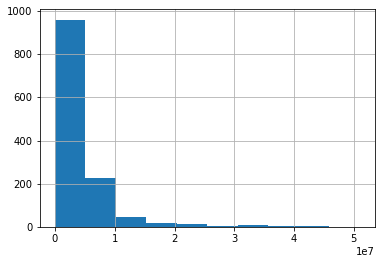

In [118]:
df_copy.STATE_REVENUE.hist()

In [119]:
# based on the distribution fill null in STATE_REVENUE with median value
df_copy.STATE_REVENUE.fillna(df_copy.STATE_REVENUE.median(), inplace=True)
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

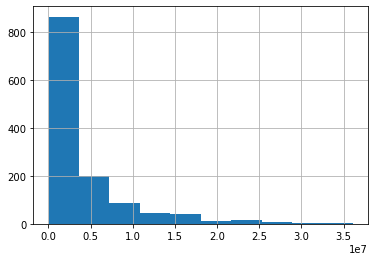

In [123]:
df_copy.LOCAL_REVENUE.hist()
# based on the distribution fill null in LOCAL_REVENUE with median value
df_copy.LOCAL_REVENUE.fillna(df_copy.LOCAL_REVENUE.median(), inplace=True)
print(df_copy.isnull().sum()*100/df_copy.isnull().count())
plt.show()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

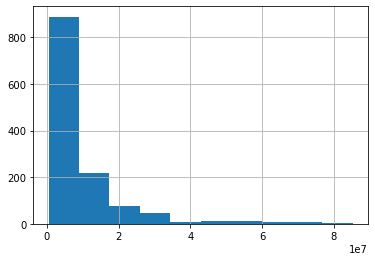

In [124]:
df_copy.TOTAL_EXPENDITURE.hist()
# based on the distribution fill null in TOTAL_EXPENDITURE with median value
df_copy.TOTAL_EXPENDITURE.fillna(df_copy.TOTAL_EXPENDITURE.median(), inplace=True)
print(df_copy.isnull().sum()*100/df_copy.isnull().count())
plt.show()

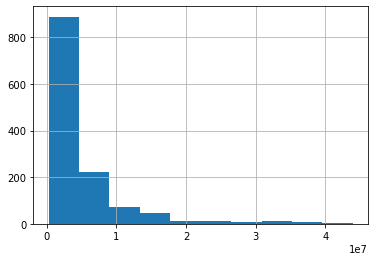

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [125]:
df_copy.INSTRUCTION_EXPENDITURE.hist()
# based on the distribution fill null in INSTRUCTION_EXPENDITURE with median value
df_copy.INSTRUCTION_EXPENDITURE.fillna(df_copy.INSTRUCTION_EXPENDITURE.median(), inplace=True)
plt.show()
print(df_copy.isnull().sum()*100/df_copy.isnull().count())


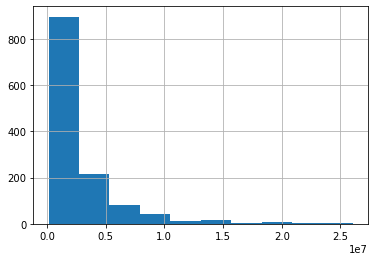

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [126]:
df_copy.SUPPORT_SERVICES_EXPENDITURE.hist()
# based on the distribution fill null in SUPPORT_SERVICES_EXPENDITURE with median value
df_copy.SUPPORT_SERVICES_EXPENDITURE.fillna(df_copy.SUPPORT_SERVICES_EXPENDITURE.median(), inplace=True)
plt.show()
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

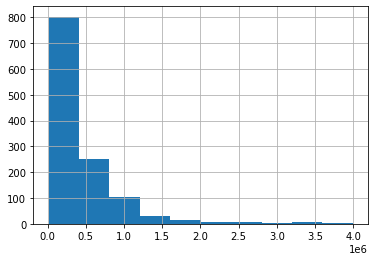

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [127]:
df_copy.OTHER_EXPENDITURE.hist()
# based on the distribution fill null in OTHER_EXPENDITURE with median value
df_copy.OTHER_EXPENDITURE.fillna(df_copy.OTHER_EXPENDITURE.median(), inplace=True)
plt.show()
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

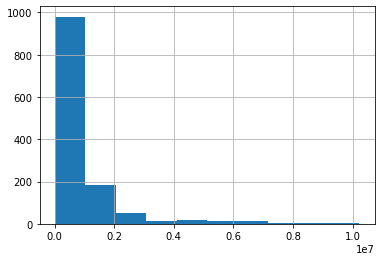

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [128]:
df_copy.CAPITAL_OUTLAY_EXPENDITURE.hist()
# based on the distribution fill null in CAPITAL_OUTLAY_EXPENDITURE with median value
df_copy.CAPITAL_OUTLAY_EXPENDITURE.fillna(df_copy.CAPITAL_OUTLAY_EXPENDITURE.median(), inplace=True)
plt.show()
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

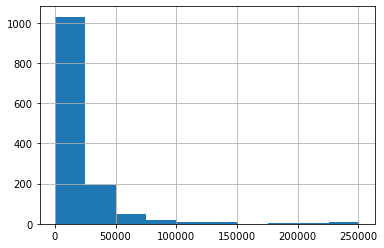

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [130]:
df_copy.GRADES_PK_G.hist()
# based on the distribution fill null in GRADES_PK_G with median value
df_copy.GRADES_PK_G.fillna(df_copy.GRADES_PK_G.median(), inplace=True)
plt.show()
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

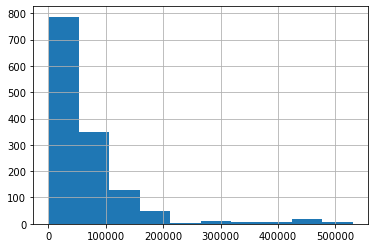

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [132]:
def fill_na(col):
    df_copy[col].hist()
    df_copy[col].fillna(df_copy[col].median(), inplace=True)
    plt.show()
    print(df_copy.isnull().sum()*100/df_copy.isnull().count())
fill_na('GRADES_KG_G')

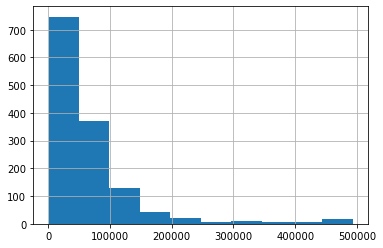

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [133]:
fill_na('GRADES_4_G')

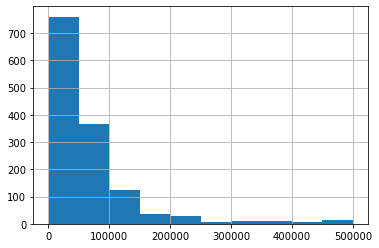

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [134]:
fill_na('GRADES_8_G')

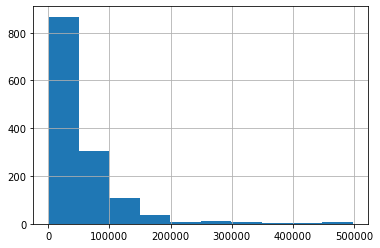

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [135]:
fill_na('GRADES_12_G')

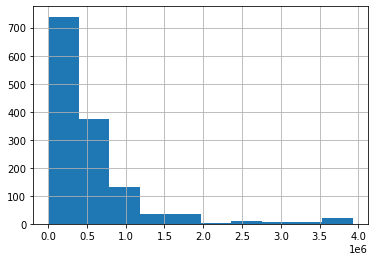

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [136]:
fill_na('GRADES_1_8_G')

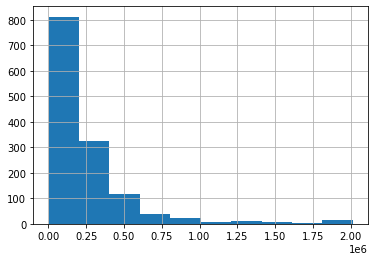

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [137]:
fill_na('GRADES_9_12_G')

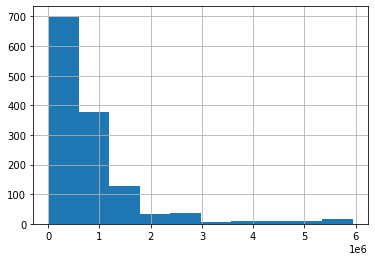

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [138]:
fill_na('GRADES_ALL_G')

In [142]:
# last 4 columns have over 60% missign values so we will drop them 
df_copy = df_copy.drop(['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis=1)

In [143]:
print(df_copy.isnull().sum()*100/df_copy.isnull().count())

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
dtype: float64


### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [243]:
df_copy2 = dsbc_df.copy()

def fill_na_year(col):
    df_copy[col].hist()
    df_copy[col].fillna(df_copy[col].median(), inplace=True)
    plt.show()
    print(df_copy.isnull().sum()*100/df_copy.isnull().count())


In [244]:
years_medians = df_copy2.groupby(by='YEAR').median()
years_list = list(years_medians.index)
years_medians.GRADES_ALL_G.values[0]

556477.5

In [245]:
index_1992 = list(df_copy2.ENROLL[df_copy2.YEAR == 1992].index)
for i in index_1992:
    df_copy2.ENROLL[i] = years_medians.GRADES_ALL_G.values[0]
print(df_copy2.isnull().sum()*100/df_copy2.isnull().count())
years_list.remove(1992)

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          13.873995
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [246]:
cols = list(df_copy2.columns)
cols.remove('PRIMARY_KEY')
cols.remove('STATE')
cols.remove('YEAR')
cols.remove('AVG_MATH_4_SCORE')
cols.remove('AVG_MATH_8_SCORE')
cols.remove('AVG_READING_4_SCORE')
cols.remove('AVG_READING_8_SCORE')
cols

['ENROLL',
 'TOTAL_REVENUE',
 'FEDERAL_REVENUE',
 'STATE_REVENUE',
 'LOCAL_REVENUE',
 'TOTAL_EXPENDITURE',
 'INSTRUCTION_EXPENDITURE',
 'SUPPORT_SERVICES_EXPENDITURE',
 'OTHER_EXPENDITURE',
 'CAPITAL_OUTLAY_EXPENDITURE',
 'GRADES_PK_G',
 'GRADES_KG_G',
 'GRADES_4_G',
 'GRADES_8_G',
 'GRADES_12_G',
 'GRADES_1_8_G',
 'GRADES_9_12_G',
 'GRADES_ALL_G']

In [247]:
for col in cols:
    j = 0
    for year in years_list:
        na_year_index = list(df_copy2[col][df_copy2.YEAR == year].index)
        for i in na_year_index:
            df_copy2[col][i] = years_medians[col].values[j]
        j += 1
print(df_copy2.isnull().sum()*100/df_copy2.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           3.753351
TOTAL_REVENUE                    0.335121
FEDERAL_REVENUE                  0.335121
STATE_REVENUE                    0.335121
LOCAL_REVENUE                    0.335121
TOTAL_EXPENDITURE                0.335121
INSTRUCTION_EXPENDITURE          0.335121
SUPPORT_SERVICES_EXPENDITURE     0.335121
OTHER_EXPENDITURE                7.506702
CAPITAL_OUTLAY_EXPENDITURE       0.335121
GRADES_PK_G                      3.552279
GRADES_KG_G                      3.418231
GRADES_4_G                       3.418231
GRADES_8_G                       3.418231
GRADES_12_G                      3.418231
GRADES_1_8_G                     3.418231
GRADES_9_12_G                    3.418231
GRADES_ALL_G                     3.552279
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 4. This time, fill in the missing values using interpolation (extrapolation).

In [248]:
df_copy3 = dsbc_df.copy()

In [249]:
for col in cols:
    df_copy3[col].interpolate(inplace=True)


In [250]:
print(df_copy3.isnull().sum()*100/df_copy3.isnull().count())

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           2.412869
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                2.412869
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?
Median by year is the most different but it could be a problem with my code.

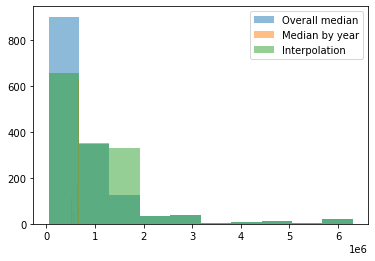

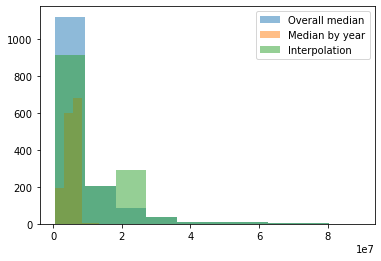

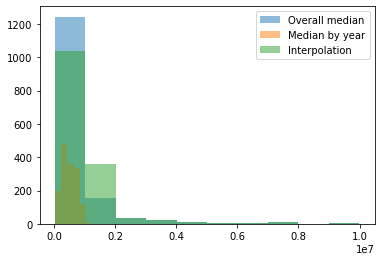

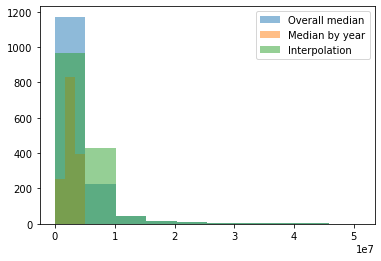

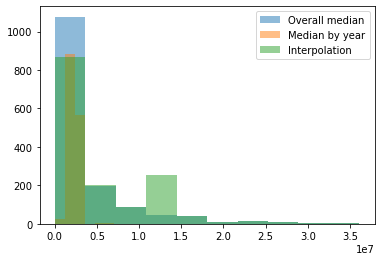

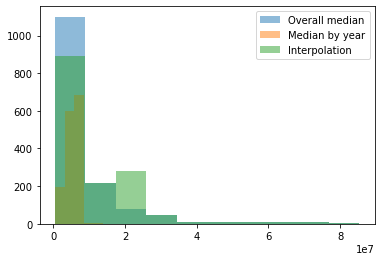

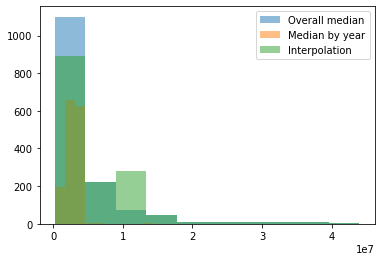

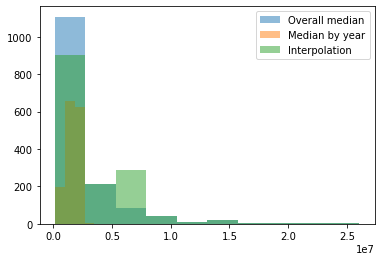

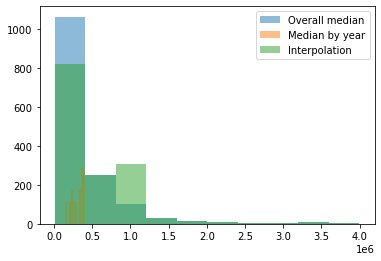

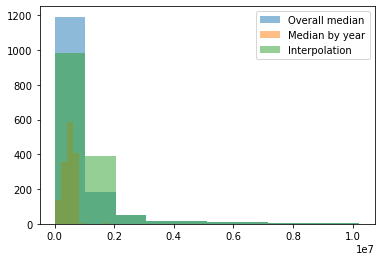

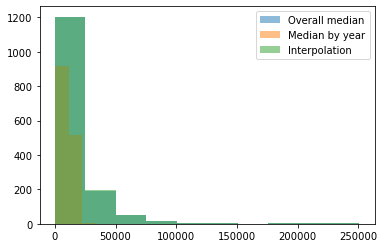

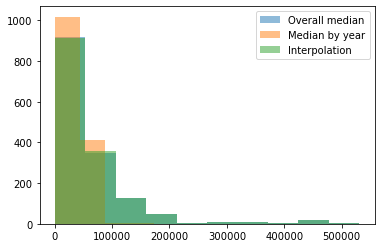

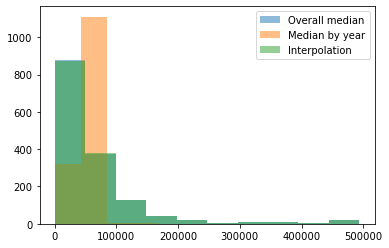

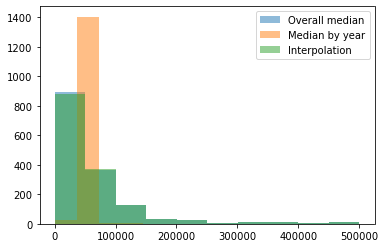

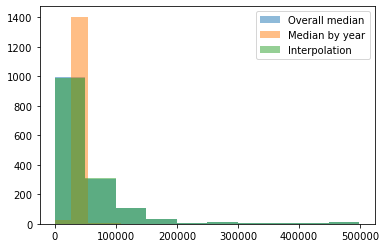

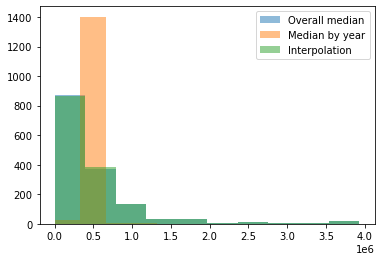

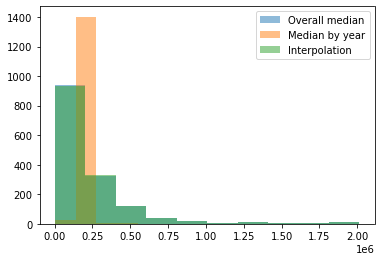

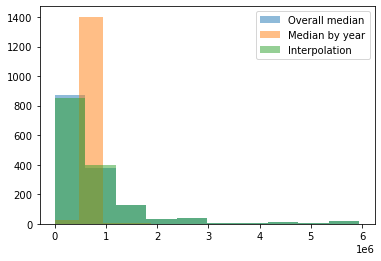

In [251]:
for col in cols:
    plt.figure()
    plt.hist(df_copy[col], alpha=0.5)
    plt.hist(df_copy2[col], alpha=0.5)
    plt.hist(df_copy3[col], alpha=0.5)
    plt.legend(['Overall median', 'Median by year', 'Interpolation'])